## LGBM and XGBM

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis (EDA):

In [67]:
#Load the Titanic Dataset
df = pd.read_csv('Titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
# details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
# Check for missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Histograms and Box Plots.**

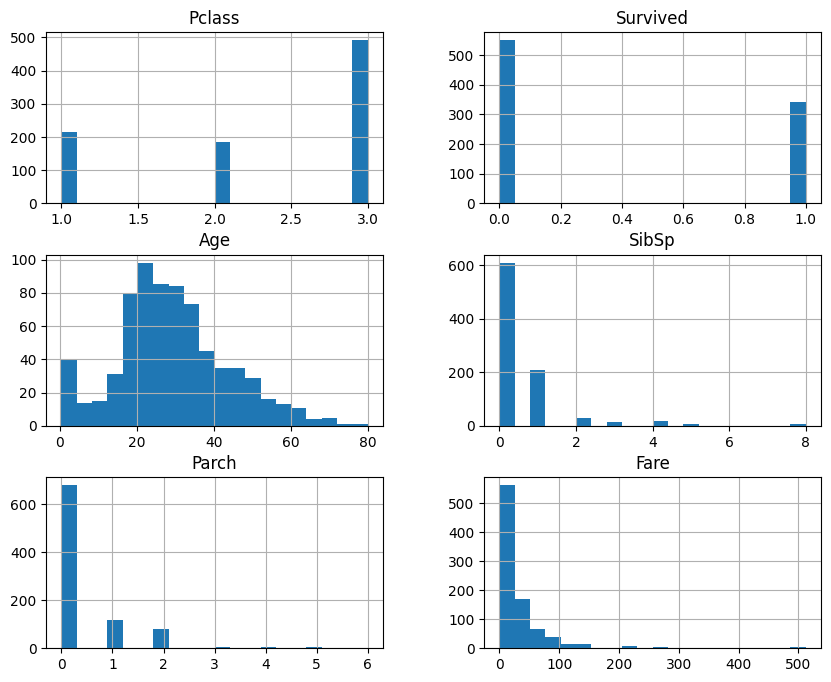

In [73]:
# Histograms
data = df[['Pclass', 'Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
data.hist(bins=20, figsize=(10,8))
plt.show()

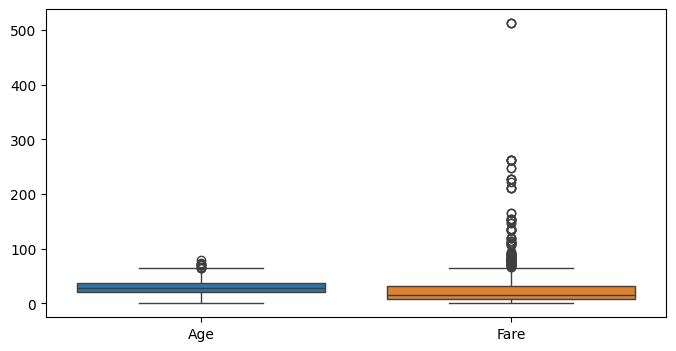

In [71]:
# Box plots for numerical features
plt.figure(figsize=(8,4))
sns.boxplot(data=df[['Age', 'Fare']])
plt.show()

**Visualize Relationships Between Features and Survival**

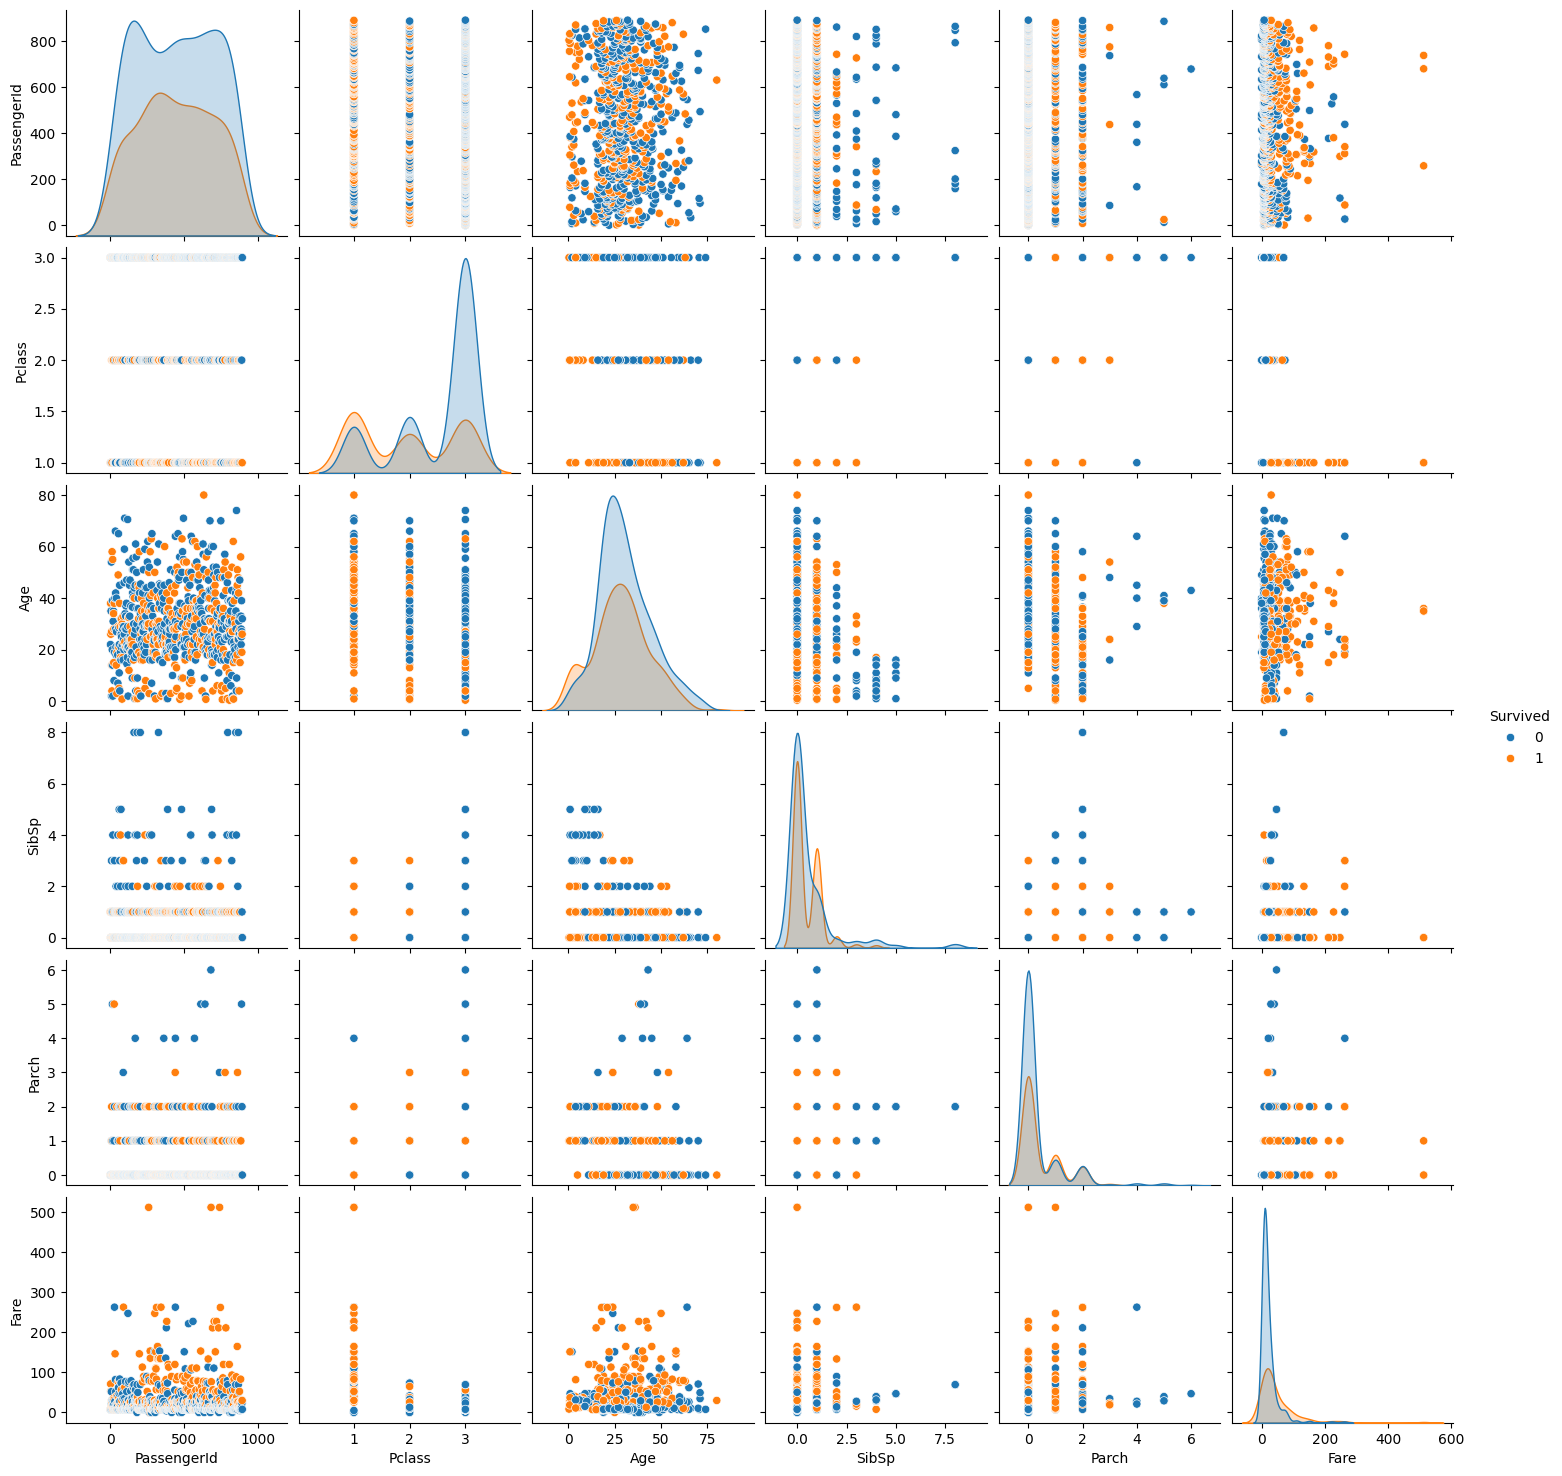

In [74]:
# Scatter plot
sns.pairplot(df, hue='Survived')
plt.show()

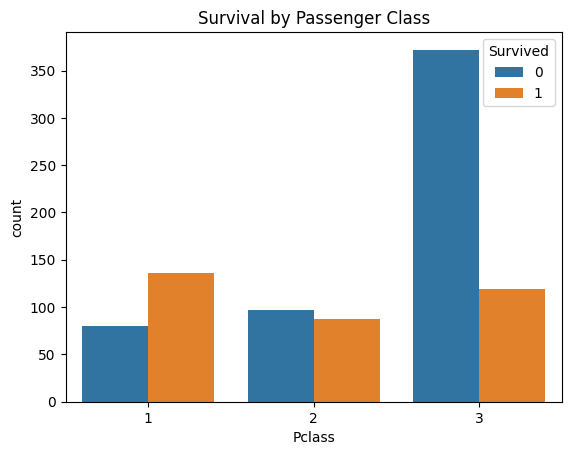

In [75]:
# Bar plots
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

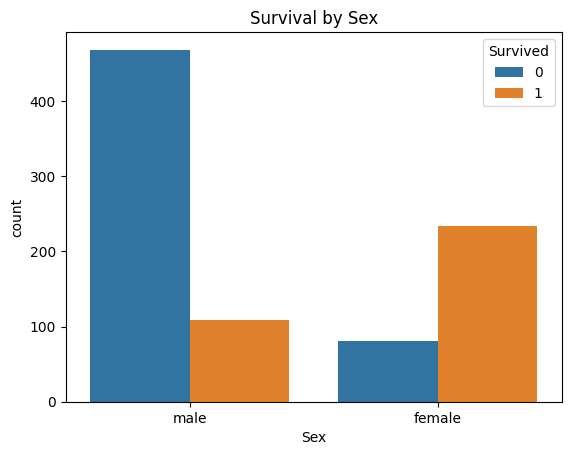

In [76]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()

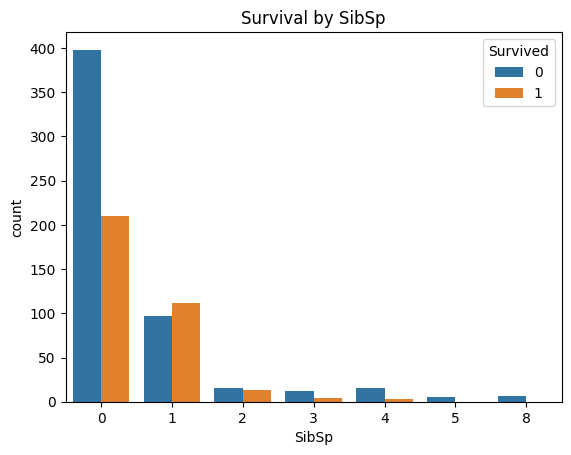

In [77]:
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title('Survival by SibSp')
plt.show()

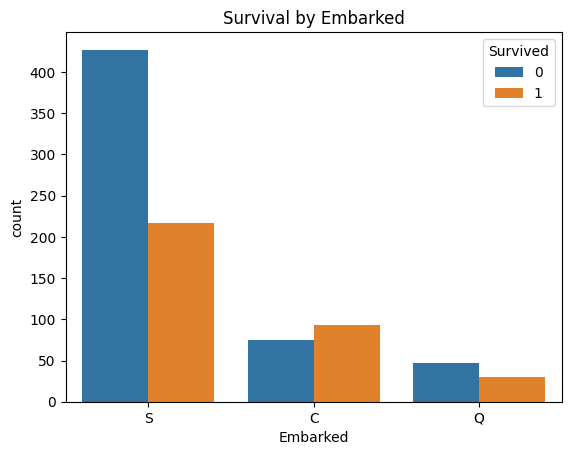

In [78]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarked')
plt.show()

### Data Preprocessing

**Impute Missing Values**

In [79]:
# Impute missing Age values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Impute missing Embarked values with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Verify missing values have been handled
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**Encoding Categorical Variables**

In [80]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [81]:
# Drop unnecessary columns
df.drop(columns=['Name', 'Ticket'], inplace=True)

df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


### Building Predictive Models

**Spliting the Dataset**

In [82]:
# Define features and target variable
X = df.drop(columns=['Survived'])
y = df['Survived']

In [83]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Building Models**

In [84]:
# Initialize the models
lgb_model = lgb.LGBMClassifier()
xgb_model = xgb.XGBClassifier()

In [85]:
# Train and evaluate LightGBM model
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
y_pred_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [86]:
# Train and evaluate XGBoost model
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

In [87]:
# Define a function to evaluate the models
def evaluate_model(y_test, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    return accuracy, precision, recall, f1, auc

In [88]:
# Evaluate both models
metrics_lgb = evaluate_model(y_test, y_pred_lgb, y_pred_proba_lgb)
metrics_xgb = evaluate_model(y_test, y_pred_xgb, y_pred_proba_xgb)

print(f"LightGBM Metrics:\nAccuracy={metrics_lgb[0]}\nPrecision={metrics_lgb[1]}\nRecall={metrics_lgb[2]}\nF1-Score={metrics_lgb[3]}\nAUC={metrics_lgb[4]}\n")
print(f"XGBoost Metrics:\nAccuracy={metrics_xgb[0]}\nPrecision={metrics_xgb[1]}\nRecall={metrics_xgb[2]}\nF1-Score={metrics_xgb[3]}\nAUC={metrics_xgb[4]}")


LightGBM Metrics:
Accuracy=0.7988826815642458
Precision=0.7794117647058824
Recall=0.7162162162162162
F1-Score=0.7464788732394366
AUC=0.8801801801801802

XGBoost Metrics:
Accuracy=0.7932960893854749
Precision=0.7534246575342466
Recall=0.7432432432432432
F1-Score=0.7482993197278911
AUC=0.8616473616473617


In [89]:
# Compute ROC curve and AUC for LightGBM
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_pred_proba_lgb)
auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)

# Compute ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

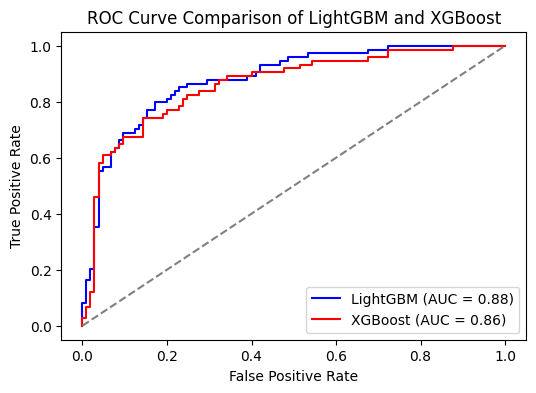

In [90]:
# Plot ROC curves
plt.figure(figsize=(6, 4))
plt.plot(fpr_lgb, tpr_lgb, color='blue', label=f'LightGBM (AUC = {auc_lgb:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='red', label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of LightGBM and XGBoost')
plt.legend()
plt.show()

**Hyperparameter Tuning**

In [91]:
# Hyperparameter tuning for LightGBM
lgb_param_grid = {
    'num_leaves': [31, 62],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
}

In [92]:
lgb_grid = GridSearchCV(lgb.LGBMClassifier(), param_grid=lgb_param_grid, cv=5, scoring='accuracy')
lgb_grid.fit(X_train, y_train)
best_lgb_model = lgb_grid.best_estimator_

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [93]:
# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
}

In [94]:
xgb_grid = GridSearchCV(xgb.XGBClassifier(), param_grid=xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)
best_xgb_model = xgb_grid.best_estimator_

In [95]:
# Evaluate the tuned models
y_pred_lgb_tuned = best_lgb_model.predict(X_test)
y_pred_proba_lgb_tuned = best_lgb_model.predict_proba(X_test)[:, 1]

y_pred_xgb_tuned = best_xgb_model.predict(X_test)
y_pred_proba_xgb_tuned = best_xgb_model.predict_proba(X_test)[:, 1]

metrics_lgb_tuned = evaluate_model(y_test, y_pred_lgb_tuned, y_pred_proba_lgb_tuned)
metrics_xgb_tuned = evaluate_model(y_test, y_pred_xgb_tuned, y_pred_proba_xgb_tuned)

print(f"Tuned LightGBM Metrics:\nAccuracy={metrics_lgb_tuned[0]}\nPrecision={metrics_lgb_tuned[1]}\nRecall={metrics_lgb_tuned[2]}\nF1-Score={metrics_lgb_tuned[3]}\nAUC={metrics_lgb_tuned[4]}\n")
print(f"Tuned XGBoost Metrics:\nAccuracy={metrics_xgb_tuned[0]}\nPrecision={metrics_xgb_tuned[1]}\nRecall={metrics_xgb_tuned[2]}\nF1-Score={metrics_xgb_tuned[3]}\nAUC={metrics_xgb_tuned[4]}")


Tuned LightGBM Metrics:
Accuracy=0.8212290502793296
Precision=0.7916666666666666
Recall=0.7702702702702703
F1-Score=0.7808219178082192
AUC=0.8907335907335907

Tuned XGBoost Metrics:
Accuracy=0.8044692737430168
Precision=0.8
Recall=0.7027027027027027
F1-Score=0.7482014388489208
AUC=0.878957528957529


In [96]:
# Compute ROC curve and AUC for LightGBM
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_pred_proba_lgb_tuned)
auc_lgb = metrics_lgb_tuned[4]

# Compute ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb_tuned)
auc_xgb = metrics_xgb_tuned[4]

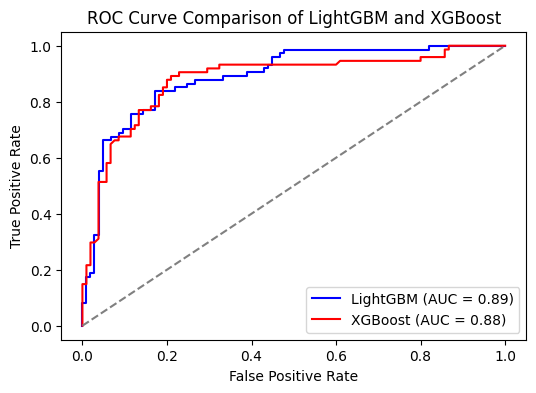

In [97]:
# Plot ROC curves
plt.figure(figsize=(6, 4))
plt.plot(fpr_lgb, tpr_lgb, color='blue', label=f'LightGBM (AUC = {auc_lgb:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='red', label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of LightGBM and XGBoost')
plt.legend()
plt.show()

### Comparative Analysis

In [98]:

# Metrics for Basic Models
metrics_basic_lgb = {
    'Accuracy': 0.7988826815642458,
    'Precision': 0.7794117647058824,
    'Recall': 0.7162162162162162,
    'F1-Score': 0.7464788732394366,
    'AUC': 0.8801801801801802
}

metrics_basic_xgb = {
    'Accuracy': 0.7932960893854749,
    'Precision': 0.7534246575342466,
    'Recall': 0.7432432432432432,
    'F1-Score': 0.7482993197278911,
    'AUC': 0.8616473616473617
}

# Metrics for Tuned Models
metrics_tuned_lgb = {
    'Accuracy': 0.8212290502793296,
    'Precision': 0.7916666666666666,
    'Recall': 0.7702702702702703,
    'F1-Score': 0.7808219178082192,
    'AUC': 0.8907335907335907
}

metrics_tuned_xgb = {
    'Accuracy': 0.8044692737430168,
    'Precision': 0.8,
    'Recall': 0.7027027027027027,
    'F1-Score': 0.7482014388489208,
    'AUC': 0.878957528957529
}

In [99]:
# Plotting function
def plot_metrics_comparison(metrics_lgb, metrics_xgb, title):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
    lgb_scores = [metrics_lgb[metric] for metric in metrics]
    xgb_scores = [metrics_xgb[metric] for metric in metrics]

    x = np.arange(len(metrics))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - width/2, lgb_scores, width, label='LightGBM', color='blue')
    ax.bar(x + width/2, xgb_scores, width, label='XGBoost', color='red')

    ax.set_xlabel('Metrics')
    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    for i, v in enumerate(lgb_scores):
        ax.text(i - width/2, v + 0.01, f"{v:.2f}", ha='center')
    for i, v in enumerate(xgb_scores):
        ax.text(i + width/2, v + 0.01, f"{v:.2f}", ha='center')

    plt.show()

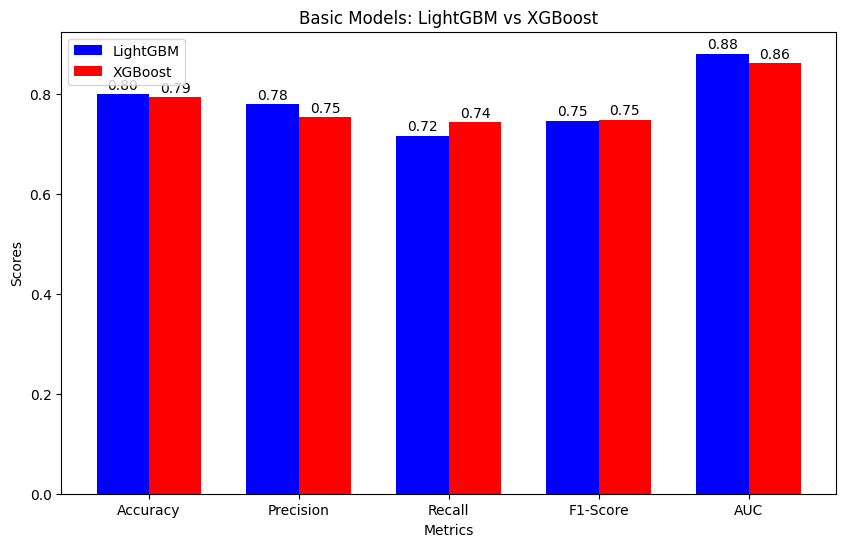

In [64]:
# Plot for Basic Models
plot_metrics_comparison(metrics_basic_lgb, metrics_basic_xgb, 'Basic Models: LightGBM vs XGBoost')

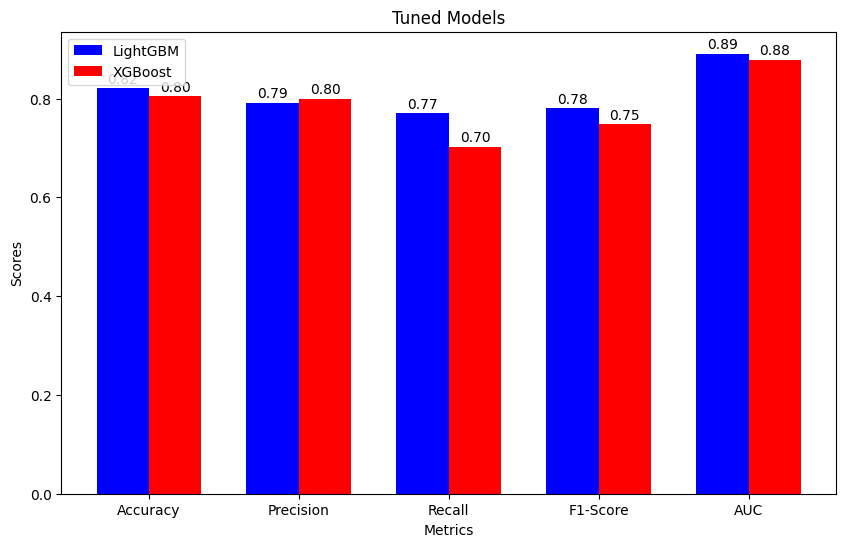

In [100]:
# Plot for Tuned Models
plot_metrics_comparison(metrics_tuned_lgb, metrics_tuned_xgb, 'Tuned Models')

### Comparative Analysis of LightGBM and XGBoost Models

#### Basic Models

- **Accuracy**: Both models perform similarly in terms of accuracy, with LightGBM achieving slightly higher accuracy (79.88%) compared to XGBoost (79.33%).
- **Precision and Recall**: LightGBM shows better precision but slightly lower recall compared to XGBoost. This indicates that LightGBM is slightly better at identifying true positives, but XGBoost has a better balance between precision and recall.
- **F1-Score**: Both models have comparable F1-scores, with LightGBM having a marginally lower score than XGBoost. This suggests that both models have a similar trade-off between precision and recall.
- **AUC**: The AUC score is slightly higher for LightGBM (0.88) than XGBoost (0.86), indicating that LightGBM has a slightly better capability to distinguish between classes.

#### Tuned Models

- **Accuracy**: After hyperparameter tuning, both models show improvement, with LightGBM now achieving an accuracy of 82.12%, while XGBoost achieves 80.45%. This shows that tuning has a more positive impact on LightGBM.
- **Precision and Recall**: LightGBM still has a slightly higher precision compared to XGBoost, and its recall also improves post-tuning. In contrast, XGBoost shows a decrease in recall after tuning, which impacts its overall performance.
- **F1-Score**: LightGBM's F1-score increases to 78.08%, indicating an improved balance between precision and recall. XGBoost, however, has a slight decline in its F1-score, showing that tuning did not yield the same level of improvement as seen with LightGBM.
- **AUC**: The AUC score for LightGBM increases to 0.89, further solidifying its capability to distinguish between classes better than XGBoost, which also sees a minor increase to 0.88.

#### Overall Insights

- **LightGBM**: Overall, LightGBM demonstrates superior performance both before and after tuning. It shows better accuracy, precision, and AUC, making it a slightly better choice for this dataset.
- **XGBoost**: While XGBoost performs well and has a balanced F1-score, it does not improve as much with tuning compared to LightGBM. It might require more extensive tuning or different parameters to match LightGBM's performance.

In conclusion, **LightGBM** outperforms **XGBoost** on this dataset, especially after hyperparameter tuning, making it the preferred model for this classification problem.


### Practical Implications

1. **Model Selection**:
   - **LightGBM** shows better overall performance in terms of accuracy, precision, and AUC. This makes it a more reliable choice for predicting survival in the Titanic dataset. For applications requiring high prediction accuracy and the ability to distinguish between classes effectively, LightGBM is preferred.

2. **Impact of Hyperparameter Tuning**:
   - Hyperparameter tuning significantly improves the performance of both models. However, LightGBM benefits more from tuning, resulting in higher accuracy and AUC scores. This suggests that investing time in tuning LightGBM's parameters can yield better results compared to XGBoost.

3. **Precision vs. Recall**:
   - LightGBM provides a higher precision, which is crucial in scenarios where false positives are costly. On the other hand, XGBoost’s balanced recall makes it suitable where missing positive cases (false negatives) is more critical. Depending on the business needs—whether focusing on minimizing false positives or false negatives—appropriate model choice should be made.

4. **Model Deployment**:
   - Given its superior performance metrics, LightGBM is likely to be a more robust choice for deployment in real-world applications where accurate classification and high AUC are essential. XGBoost, while competitive, may require additional tuning to achieve similar results.

In summary, the choice between LightGBM and XGBoost should be guided by the specific requirements of the application, including the importance of precision, recall, and overall model accuracy.
